# Trading Day Data Visualization

#### 1) minute chart data from finance.yahoo

In [1]:
from urllib.parse import urlencode
from datetime import datetime, timedelta
import pandas as pd
import requests
import pytz
import json

DATA_TIMEZONE = pytz.timezone("US/Eastern")

def get_minute_data(symbol, now):
    
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    end = start.replace(hour=13, minute=0)  
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1m&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start.timestamp(), end.timestamp())
            
    page = requests.get(url)
    result = page.json()['chart']['result']
    if not result:
        print(page.json())
        return
    
    data = result[0]
    quote = data['indicators']['quote'][0]
    if 'timestamp' not in data:
        return
    times = data['timestamp']
    period = data['meta']['currentTradingPeriod']['regular']
    start, end = period['start'], period['end']
    df = pd.DataFrame(quote, index=[datetime.fromtimestamp(t, tz=DATA_TIMEZONE).astimezone(now.tzinfo) for t in times])
    return df


la_tz = pytz.timezone('America/Los_Angeles')
now = datetime.now(tz=la_tz)
minute_data = get_minute_data('BAC', now)
minute_data

,close,high,low,open,volume
2017-05-25 06:30:00-07:00,23.400000,23.400000,23.379999,23.379999,0
2017-05-25 06:31:00-07:00,23.410000,23.410000,23.379999,23.400000,265460
2017-05-25 06:32:00-07:00,23.420000,23.430000,23.410000,23.420000,248343
2017-05-25 06:33:00-07:00,23.415001,23.434999,23.414101,23.430000,158748
2017-05-25 06:34:00-07:00,23.379999,23.420000,23.379999,23.420000,210018
2017-05-25 06:35:00-07:00,23.340000,23.391100,23.309999,23.379999,613070
2017-05-25 06:36:00-07:00,23.379999,23.389000,23.344000,23.344000,185076
2017-05-25 06:37:00-07:00,23.400000,23.420000,23.389999,23.389999,274811
2017-05-25 06:38:00-07:00,23.385000,23.400000,23.385000,23.400000,86764
2017-05-25 06:39:00-07:00,23.355000,23.389999,23.350000,23.379999,193683


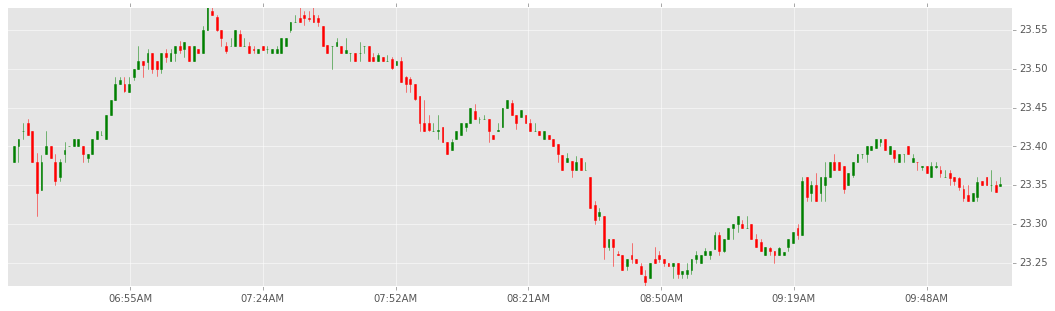

In [2]:
from matplotlib.finance import *
import matplotlib.pyplot as plt
from matplotlib import ticker, style
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
    
style.use('ggplot')

def plot_minute_data(data):
    if data is not None:
        fig = plt.figure(figsize=(18, 5))
        ax = plt.subplot(111)
        candlestick_ochl(
            ax, 
            ((date2num(r.Index), r.open, r.close, r.high, r.low) 
             for r in data.itertuples()), 
            width=1/3600,  
            colorup='g',  
            colordown='r',
        )

        x_min, x_max = date2num(data.index.min()) - .001, date2num(data.index.max()) + .001
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(data.low.min(), data.high.max())

        minute_formatter = DateFormatter('%I:%M%p', tz=pytz.timezone('America/Los_Angeles'))
        ax.xaxis.set_major_formatter(minute_formatter)

        ax.yaxis.tick_right()
        plt.show()

plot_minute_data(minute_data)

#### 2) the trade lot data from nasdaq.com

In [3]:
from urllib.parse import quote_plus, urlparse, parse_qs
from lxml import html
import queue
import requests
import threading
import re

def get_proxies():
    with open("approved_proxies.csv", "r") as f:
        proxies = f.read().split()
    return proxies

NUM_THREADS = 100


class ProxyFailException(Exception):
    pass    

def load_in_parrallel(*args, now, scrap_func, save_func):   
    
    tasks = queue.Queue() # queue with arguments for the 'get_transactions' function
    responses = queue.Queue() # queue with raw responses  
    proxies = queue.Queue()
    for p in get_proxies():
        proxies.put(p)
        
    def get_proxy():
        try:
            proxy = proxies.get_nowait()
        except queue.Empty:        
            pass
            #print("Error: you have used all the proxies - this worker will stop")
        else:    
            return proxy
    
    def worker():        
        proxy = get_proxy()        
        while proxy is not None:            
            args = tasks.get()
            if args is None:
                break   
            while True:
                try:
                    scrap_func(proxy, tasks, responses, *args)
                except ProxyFailException as e:
                    proxy = get_proxy()
                    if proxy is None:
                        tasks.put(args)  # put the task back and die
                        break                    
                else:
                    break   
            tasks.task_done()
    

    threads = []
    for i in range(NUM_THREADS):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
        
    tasks.put(args)

    # block until all tasks are done
    tasks.join()

    # stop workers
    for i in range(NUM_THREADS):
        tasks.put(None)

    for t in threads:
        t.join()
        
    return save_func(responses, now)


def get_trades_tree(proxy, stock, time, pageno):
    base_url = "http://www.nasdaq.com/symbol/{symbol}/time-sales?time={time}&pageno={pageno}"
    url = base_url.format(symbol=stock, time=time, pageno=pageno)
    try:
        page_res = requests.get(url, timeout=6, proxies={'http': "http://{}".format(proxy)})
        result = html.fromstring(page_res.content)
    except Exception as e:
        raise ProxyFailException()        
    else:    
        return result
    
def page_get_lots(tree):
    table = tree.find('.//table[@id="AfterHoursPagingContents_Table"]')
    if table is None:
        raise ProxyFailException('The table is missing')
    else:
        lots = [
            tuple(col.text_content() for col in row) 
            for row in table 
            if row.tag == 'tr'
        ]
        return lots

def pull_trades(proxy, q, r, stock, time, pageno=None):
    tree = get_trades_tree(proxy, stock, time, pageno or 1)
    
    if tree is not None:

        if pageno is None:
            pager = tree.find('.//ul[@id="pager"]')
            if pager is not None:
                page_links = pager.findall('.//a')
                if page_links:
                    href = page_links[-1].attrib['href']
                    parsed_url = urlparse(href)
                    query_params = parse_qs(parsed_url.query)
                    max_page = int(query_params['pageno'][0])
                    
                    for pn in range(1, max_page + 1):
                        q.put((stock, time, pn))
            else:
                raise ProxyFailException('The pager is missing')
                
        for l in page_get_lots(tree):
            r.put(l)
            
def save_trades(r, now):
    df = pd.DataFrame([], columns=('Time', 'Price', 'Volume'))
    i = 0
    while True:
        try:
            time, price, volume = r.get(block=False)
        except queue.Empty:
            break
        else:
            df.loc[i] = re.sub(r'[^\d:]+', '', time), float(re.sub(r'[^\d\.]+', '', price)), int(re.sub(r'[^\d]+', '', volume))
            i += 1
    return df

In [4]:
def get_trade_lots(symbol, now, time):    
    df = load_in_parrallel(symbol, time, now=now, scrap_func=pull_trades, save_func=save_trades,) 
    df = df[df.Volume >= 1000]
    df['Minute'] = df.Time.str[:5]
    df['Cost'] = df.Price * df.Volume * 100   
    df['TimePeriod'] = time
    df = df.sort_values(by=['Time'], ascending=False)
    return df

df = get_trade_lots('BAC', now, time=1)
df

,Time,Price,Volume,Minute,Cost,TimePeriod
15,09:59:52,23.5190,4000,09:59,9407600.00,1
2965,09:59:52,23.5190,4000,09:59,9407600.00,1
2982,09:59:48,23.5100,2300,09:59,5407300.00,1
32,09:59:48,23.5100,2300,09:59,5407300.00,1
47,09:59:47,23.5200,2800,09:59,6585600.00,1
3533,09:59:47,23.5200,2100,09:59,4939200.00,1
2997,09:59:47,23.5200,2800,09:59,6585600.00,1
3546,09:59:45,23.5200,1000,09:59,2352000.00,1
3551,09:59:42,23.5150,2000,09:59,4703000.00,1
3550,09:59:42,23.5190,6000,09:59,14111400.00,1


In [5]:
# This function will display the table
from IPython.display import display, HTML
from datetime import datetime
import numpy as np
import math


def display_trade_lots_tables(data, minute_data, now):
    if data is None or not len(data):
        print("Trade lots list is empty")
        return
    data['Count'] = 1      
    def apply_minute_data(df):
        eastern = pytz.timezone('US/Eastern')
        def get_minute_data(row):
            minute = row.Minute if 'Minute' in df.dtypes.keys() else row.name 
            hour, minute = minute.split(':')
            time = now.replace(hour=int(hour), minute=int(minute), second=0, microsecond=0, tzinfo=eastern)
            time = datetime(
                now.year, now.month, now.day, 
                hour=int(hour), minute=int(minute), second=0, microsecond=0,
            )        
            time = eastern.localize(time)

            if minute_data is not None and time in minute_data.index:
                md = minute_data.loc[time]
                open, close = md.open, md.close
            else:
                open = close = None        
            return open, close    

        df['Open'], df['Close'] = zip(*df.apply(get_minute_data, axis=1))
        df['CloseByOpen'] = (df.Close / df.Open - 1) * 100
    
    def display_table(rows):
        headers = ("Time", "Open", "Close", "Close/Open", "Shares", "Cost", "# of lots")
        row = "<td>{time}</td><td>{open}</td><td>{close}</td><td>{co_tab} {close_by_open}</td>"\
              "<td>{vo_tab} {volume:,.0f}</td><td>{cost_tab} {cost:,.0f}</td><td>{count_tab} {count}</td>"
        table_rows = (row.format(**kwargs) for kwargs in rows) 
        display(
            HTML(
                '<table><tr><th>{}</th></tr><tr>{}</tr></table>'.format(
                    "</th><th>".join(headers),
                    "</tr><tr>".join(table_rows)
                )
            )
        )  
    
    
    display(HTML("<h4>AGGREGATED TRADING FEED BY MINUTE</h4>"))
    sum_data = data.groupby(['Minute'])['Cost', 'Volume', 'Count'].sum()
    apply_minute_data(sum_data)
    sum_data = sum_data.sort_index(ascending=False)
    
    def get_tab(value, min_value, max_value, color):
        n = 0        
        if not pd.isnull(value):
            diff = max_value - min_value
            if diff:
                n = math.ceil((value - min_value) / diff * 20)
                
        return '<div style="float:left;background-color:{};height=20px;" >{}</div>&nbsp;'.format(
            "green" if color >= 0 else "red",
            "&nbsp;" * (n + 1), 
        )
    min_co, max_co = sum_data.CloseByOpen.min(), sum_data.CloseByOpen.max()
    min_vo, max_vo = sum_data.Volume.min(), sum_data.Volume.max()
    min_cost, max_cost = sum_data.Cost.min(), sum_data.Cost.max()
    min_count, max_count = sum_data.Count.min(), sum_data.Count.max()
    rows = (dict(time=r.Index, 
                 open="{:.4f}".format(r.Open) if r.Open else r.Open, 
                 close="{:.4f}".format(r.Close) if r.Close else r.Close, 
                 close_by_open="{:.4f}".format(r.CloseByOpen) if r.CloseByOpen else r.CloseByOpen,                 
                 volume=r.Volume, cost=r.Cost, count=r.Count,
                 co_tab=get_tab(r.CloseByOpen, min_co, max_co, r.CloseByOpen),
                 vo_tab=get_tab(r.Volume, min_vo, max_vo, r.CloseByOpen),
                 cost_tab=get_tab(r.Cost, min_cost, max_cost, r.CloseByOpen),
                 count_tab=get_tab(r.Count, min_count, max_count, r.CloseByOpen),
                ) 
            for r in sum_data.itertuples())
    display_table(rows)
    
    display(HTML("<h4>SEGREGATED TRADING FEED BY MINUTE</h4>"))
    apply_minute_data(data)
    min_co, max_co = data.CloseByOpen.min(), data.CloseByOpen.max()
    min_vo, max_vo = data.Volume.min(), data.Volume.max()
    min_cost, max_cost = data.Cost.min(), data.Cost.max()
    min_count, max_count = data.Count.min(), data.Count.max()
    rows = (dict(time=r.Minute, 
                 open="{:.4f}".format(r.Open) if r.Open else r.Open, 
                 close="{:.4f}".format(r.Close) if r.Close else r.Close, 
                 close_by_open="{:.4f}".format(r.CloseByOpen) if r.CloseByOpen else r.CloseByOpen,                  
                 volume=r.Volume, cost=r.Cost, count=r.Count,
                 co_tab=get_tab(r.CloseByOpen, min_co, max_co, r.CloseByOpen),
                 vo_tab=get_tab(r.Volume, min_vo, max_vo, r.CloseByOpen),
                 cost_tab=get_tab(r.Cost, min_cost, max_cost, r.CloseByOpen),
                 count_tab=get_tab(r.Count, min_count, max_count, r.CloseByOpen),
                )
            for r in data.itertuples())
    display_table(rows)
    
    
#     return sum_data 

display_trade_lots_tables(df, minute_data, now)

Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,23.5090,23.5200,0.0468,"39,042","91,806,771",13
09:58,23.5100,23.5050,-0.0213,"14,763","34,703,057",8
09:57,23.5000,23.5100,0.0426,"204,570","480,854,170",72
09:56,23.4900,23.5000,0.0426,"57,080","134,075,510",16
09:55,23.4700,23.4800,0.0426,"44,828","105,260,026",16
09:54,23.4800,23.4710,-0.0383,"66,577","156,293,445",19
09:53,23.4800,23.4850,0.0213,"57,698","135,500,670",19
09:52,23.4600,23.4800,0.0853,"94,173","221,054,473",34
09:51,23.4400,23.4600,0.0853,"176,129","413,078,698",50
09:50,23.4100,23.4400,0.1282,"55,980","131,130,257",25


Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,23.5090,23.5200,0.0468,"4,000","9,407,600",1
09:59,23.5090,23.5200,0.0468,"4,000","9,407,600",1
09:59,23.5090,23.5200,0.0468,"2,300","5,407,300",1
09:59,23.5090,23.5200,0.0468,"2,300","5,407,300",1
09:59,23.5090,23.5200,0.0468,"2,800","6,585,600",1
09:59,23.5090,23.5200,0.0468,"2,100","4,939,200",1
09:59,23.5090,23.5200,0.0468,"2,800","6,585,600",1
09:59,23.5090,23.5200,0.0468,"1,000","2,352,000",1
09:59,23.5090,23.5200,0.0468,"2,000","4,703,000",1
09:59,23.5090,23.5200,0.0468,"6,000","14,111,400",1


1) minute chart data from finance.yahoo


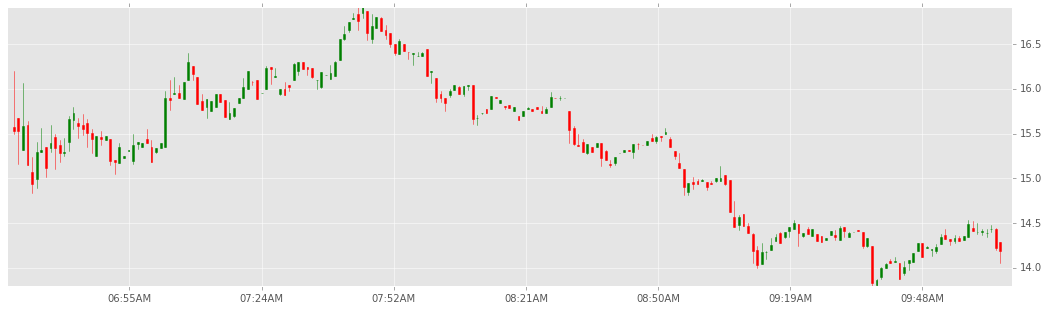

2) the trade lot data from nasdaq.com


Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,15.4400,15.4000,-0.2591,"30,255","46,873,386",18
09:57,15.3900,15.4100,0.1300,"7,400","11,408,822",6
09:56,15.2000,15.3700,1.1184,"20,830","32,027,739",14
09:55,15.3032,15.3200,0.1098,"6,000","9,216,820",3
09:54,15.2300,15.2500,0.1313,"6,800","10,351,428",3
09:53,15.1740,15.3501,1.1605,"7,302","11,135,510",4
09:52,15.2065,15.1900,-0.1085,"12,165","18,456,232",8
09:51,15.4400,15.2000,-1.5544,"14,800","22,540,831",10
09:49,15.4670,15.4450,-0.1422,"6,500","10,048,100",4
09:48,15.2500,15.4800,1.5082,"4,600","7,039,890",3


Time,Open,Close,Close/Open,Shares,Cost,# of lots
09:59,15.4400,15.4000,-0.2591,"2,000","3,085,580",1
09:59,15.4400,15.4000,-0.2591,"2,000","3,085,580",1
09:59,15.4400,15.4000,-0.2591,"1,000","1,551,260",1
09:59,15.4400,15.4000,-0.2591,"1,000","1,551,260",1
09:59,15.4400,15.4000,-0.2591,"4,000","6,200,000",1
09:59,15.4400,15.4000,-0.2591,"1,000","1,554,990",1
09:59,15.4400,15.4000,-0.2591,"1,000","1,554,990",1
09:59,15.4400,15.4000,-0.2591,"4,000","6,200,000",1
09:59,15.4400,15.4000,-0.2591,"2,055","3,187,326",1
09:59,15.4400,15.4000,-0.2591,"1,000","1,550,000",1


last update 2017-05-25 10:06:46.237672-07:00
prev update None
update time 0:01:10.478024


KeyboardInterrupt: 

In [6]:
from datetime import datetime, timedelta
from IPython.display import clear_output
from matplotlib import ticker, dates as mdates
import numpy as np
import pytz
from time import sleep
import heapq
import math

tz = pytz.timezone('America/Los_Angeles')
STOCK_SYMBOL = 'GLYC'

last_time = None
trade_lots = None
lots_times = (
    (6, 59),
    (7, 29),
    (7, 59),
    (8, 29),
    (8, 59),
    (9, 29),
    (9, 59),
    (10,29),
    (10, 59),
    (11, 29),
    (11, 59),
    (12, 29),
    (13, 0),
)
current_time_period = 1


while True:    
    now = datetime.now(tz=tz)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds            
            if diff > 0:
                sleep(diff)
        
        # GETTING DATA
        minute_data = get_minute_data(STOCK_SYMBOL, now)        
        
        leh, lem = lots_times[current_time_period - 1]
        time_range_end = start.replace(hour=leh, minute=lem)
        if last_time and last_time > time_range_end:
            current_time_period += 1
        
        response = get_trade_lots(STOCK_SYMBOL, now, current_time_period)
        res_len = len(response)
        if res_len:            
            if trade_lots is not None:
                trade_lots = trade_lots[trade_lots.TimePeriod != current_time_period]
                trade_lots = response.append(trade_lots, ignore_index=True)
            else:
                trade_lots = response

        # DISPLAYING DATA
        clear_output()
        print('1) minute chart data from finance.yahoo')
        plot_minute_data(minute_data)
        
        print('2) the trade lot data from nasdaq.com')
        display_trade_lots_tables(trade_lots, minute_data, now)    
        
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=tz) - now)
        last_time = now        
    else: 
        current_time_period = 1
        trade_lots = None
        
        if now < start:
            diff = start - now
            print("time to start:", diff)
            
        else:
            start_tommorow = start + timedelta(days=1)
            print("start tommorow at", start_tommorow)
            diff = start_tommorow - now
        
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)